# RANDOM FOREST CLASSIFIER

In [5]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import KNNImputer


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Upload a DataFrame

In [3]:
df_train = pd.read_csv('training_dataset_ready_for_imputation.csv')
del df_train['Unnamed: 0']
df_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,2.0,1,5.0,5.0,5.0,4.0,2.0,3.0,...,2.0,1.0,0.0,1.0,52.0,NaN,0,272,0.0,5.0
1,98800002,0,1.0,0,5.0,1.0,2.0,4.0,1.0,4.0,...,4.0,4.0,1.0,1.0,48.0,1.0,1,2200,9.0,0.0
2,98800003,1,2.0,1,2.0,2.0,2.0,2.0,4.0,5.0,...,5.0,5.0,0.0,1.0,43.0,0.0,0,1061,77.0,119.0
3,98800004,0,3.0,0,2.0,NaN,2.0,3.0,2.0,3.0,...,3.0,3.0,0.0,1.0,44.0,0.0,0,780,13.0,18.0
4,98800005,1,3.0,0,3.0,3.0,3.0,2.0,4.0,5.0,...,4.0,4.0,0.0,1.0,50.0,0.0,0,1981,0.0,0.0


## Knowing HOW Many MISSING Values

In [4]:
df_train.isna().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8924
Catering                   8734
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               90
Ease_of_Online_Booking       72
Onboard_Service            7599
Legroom                      90
Baggage_Handling            141
CheckIn_Service              76
Cleanliness                   6
Online_Boarding               6
Gender                       76
Customer_Type              8941
Age                          33
Type_Travel                9214
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

## Do a PIPELINE with IMPUTATION and the MODEL requested as Classifier

In [6]:
# Creating metric function to SHOW Imputation

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.1f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [7]:
# Print the Accuracy of the PREDICTION
def accuracy(y_train_test, y_pred_train_test):
    cm = confusion_matrix(y_train_test, y_pred_train_test)
    tot = sum(sum(cm))
    zero = cm[0][0]
    one = cm[1][1]

    accuracy = (one + zero)/tot
    return accuracy

### THE True Train and Test

In [8]:
X_train = df_train.drop(['ID',"Overall_Experience"], axis=1) # keep it as a Matrix
y_train = df_train["Overall_Experience"]  # keep it as an array

X_train.shape

(94291, 23)

### SPLIT THE TRAIN SET in further Train-Train to check 

In [9]:
X_train_train ,X_train_test , y_train_train, y_train_test = train_test_split(X_train , y_train, test_size=0.3, random_state=5, stratify= y_train)


In [10]:
numeric_features_min_max = ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering','Platform_Location', 'Onboard_Wifi_Service', 
                            'Onboard_Entertainment','Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service','Legroom', 'Baggage_Handling', 
                            'CheckIn_Service', 'Cleanliness','Online_Boarding', 'Gender', 'Customer_Type', 'Age', 'Type_Travel','Travel_Class']

numeric_features_standard = [   'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']


numeric_transformer = Pipeline(
    steps = [ ('scaler1', MinMaxScaler() ), ('scaler2', StandardScaler() ), ('imputer', KNNImputer(n_neighbors=4) ) ] 
    # ('imputer', SimpleImputer(strategy='median') ), ADD LATER ON, , ('imputer',  IterativeImputer(random_state=0, initial_strategy='median') ('imputer', KNNImputer(n_neighbors=4) )
)

# Here the pre-processor step
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric1", numeric_transformer, numeric_features_min_max ),
        ("numeric2", numeric_transformer, numeric_features_standard )
    ]
)

# here the Pipeline
pipe_rf = Pipeline(
    steps = [('preprocessor', preprocessor), ('regressor', RandomForestClassifier(n_estimators = 200, n_jobs=-1) ) ]#n_estimators =1000 5min try 2k
)


#pipe_rf.fit(X_train_train, y_train_train)

#y_pred_train_train = pipe_rf.predict(X_train_train)

#metrics_score(y_train_train, y_pred_train_train)


In [11]:
pipe_rf.fit(X_train_train, y_train_train)

y_pred_train_test = pipe_rf.predict(X_train_test)

#metrics_score(y_train_test, y_pred_train_test)
accuracy(y_train_test, y_pred_train_test)

0.9519230769230769

## Testing the same without Pipeline

In [12]:
#X_train_train
scaler1 = MinMaxScaler()
X_train_train2 = X_train_train.copy()
X_train_test2 = X_train_test.copy()
X_train_train2[numeric_features_min_max] = scaler1.fit_transform(X_train_train2[numeric_features_min_max])
X_train_test2[numeric_features_min_max] = scaler1.transform(X_train_test2[numeric_features_min_max])

scaler2 = StandardScaler()
X_train_train2[numeric_features_standard] = scaler2.fit_transform(X_train_train2[numeric_features_standard])
X_train_test2[numeric_features_standard] = scaler2.transform(X_train_test2[numeric_features_standard])

# imputer
imputer = KNNImputer(n_neighbors=4) 
X_train_train2 = imputer.fit_transform(X_train_train2)
X_train_test2 = imputer.transform(X_train_test2)
#pd.DataFrame(X_train_train2).isna().sum()



In [16]:
# Model
model = RandomForestClassifier(n_estimators = 500, n_jobs=-1)
model.fit(X_train_train2, y_train_train)

# test accuracy
y_pred_train_test2 = model.predict(X_train_test2)

#metrics_score(y_train_test, y_pred_train_test)
accuracy(y_train_test, y_pred_train_test2)

0.9519230769230769

# Improving pipe_rf

In [68]:
#pipe_rf.get_params()

pipe_param_grid = {   'regressor__bootstrap': [True],
 'regressor__ccp_alpha': [0.0],
 'regressor__class_weight': [None],
 'regressor__criterion': ['gini'],
 'regressor__max_depth': [None],
 'regressor__max_features': ['auto'],
 'regressor__max_leaf_nodes': [None],
 'regressor__max_samples': [None],
 'regressor__min_impurity_decrease': [0.0],
 'regressor__min_samples_leaf': [1], 
 'regressor__min_samples_split': [2],
 'regressor__min_weight_fraction_leaf': [0.0],
 'regressor__n_estimators': [100], #### AS HIGH AS POSSIBLE
 'regressor__n_jobs': [None], 
 'regressor__oob_score': [False],
 'regressor__random_state': [None],
 'regressor__warm_start': [False]}

In [15]:
pipe_param_grid = {   'bootstrap': [True],
 'ccp_alpha': [0.01, 0.1, 0,1],
 'class_weight': [None],
 'criterion': ['gini'],
 'max_depth': [None],
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_samples_leaf': [1], 
 'min_samples_split': [2],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [100, 200, 500], #### AS HIGH AS POSSIBLE
 'n_jobs': [None], 
 'oob_score': [False],
 'random_state': [None],
 'warm_start': [False]}

grid = GridSearchCV(model, pipe_param_grid, cv=3 ,
                    verbose = 50 , n_jobs=-1)

grid.fit(X_train_train2, y_train_train)

print('\nBest Accuracy Score : %.4f'%grid.best_score_, '\nBast Params: ', str(grid.best_params_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Accuracy Score : 0.9510 
Bast Params:  {'bootstrap': True, 'ccp_alpha': 0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'warm_start': False}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29917
           1       1.00      1.00      1.00     36088

    accuracy                           1.00     66005
   macro avg       1.00      1.00      1.00     66005
weighted avg       1.00      1.00      1.00     66005



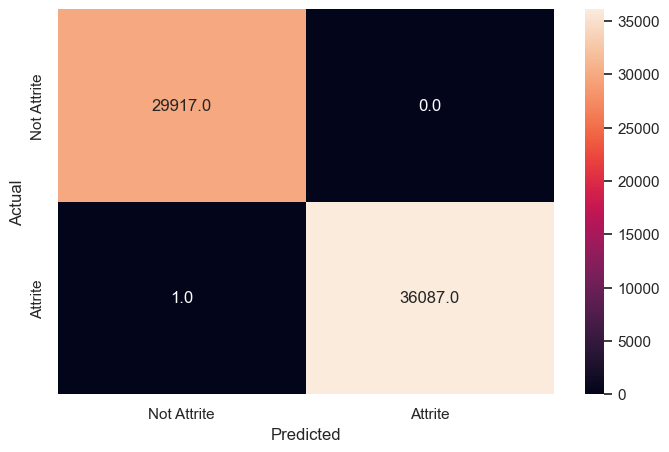

In [24]:
y_pred_train = grid.predict(X_train_train2)

metrics_score(y_train_train, y_pred_train)

a